In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import model_selection
from sklearn import preprocessing

#On importe les donnes
B = pd.read_csv('10var.csv', delimiter= ',',header=0)

In [9]:
B.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
print(B)

       cle  mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0        0        6          0      0              3            5          0   
1        1        0          0      2              4            2          0   
2        2        6          0      2              4            2          0   
3        3        6          0      0              4            2          0   
4        4        0          0      0              3            6          0   
5        5        6          0      0              3            0          0   
6        6        6          0      0              5            0          0   
7        7        0          0      0              3            0          0   
8        8        5          0      0              3            0          0   
9        9        0          0      2              7            3          0   
10      10        6          0      0              7            0          0   
11      11        5          0      2   

In [10]:
varexpliquee = B['assur_caravane']

In [11]:
#Preparation
C = B.copy()

X_knn = C[C.columns[1:-1]]
#print(X_knn)

#Créer le vecteur d'étiquettes
y_knn = C['assur_caravane']
#print(y_knn)


#Over / Under sampling

#Bon resultat
#from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(X_knn, y_knn)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_resampled, y_resampled = nm1.fit_resample(X_knn, y_knn)

#Bon resultat
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_resampled, y_resampled = smote_tomek.fit_resample(X_knn, y_knn)

#Resultat incroyable
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_knn, y_knn)

#print(X_resampled)
#print(y_resampled)

#Separation en table entrainement et test
X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)


# Optimisation du paramètre de complexité k

# Grille de valeurs

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10, 11, 13, 15]}

# Choix du score à optimiser
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_knn = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_knn.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_knn.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_knn.cv_results_['mean_test_score'], # score moyen
        clf_knn.cv_results_['std_test_score'],  # écart-type du score
        clf_knn.cv_results_['params']           # valeur de l'hyperparamètre
    ):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,mean,std*2,params))

# Meilleur choix de l'hyperparmetre k : 2

#Mesure de performance (avec k = 2)

# Prévision de l'échantillon test
pred = clf_knn.predict(x_test)

# Precision
print("\n precision")
print(precision_score(y_test,pred))

# Rappel
print("\n rappel")
print(recall_score(y_test,pred))

# F1 score
print("\n score f1")
print(f1_score(y_test,pred))

# Matrice de confusion
print(confusion_matrix(y_test,pred))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 1}
Résultats de la validation croisée :
accuracy = 0.980 (+/-0.009) for {'n_neighbors': 1}
accuracy = 0.979 (+/-0.008) for {'n_neighbors': 2}
accuracy = 0.955 (+/-0.012) for {'n_neighbors': 3}
accuracy = 0.958 (+/-0.007) for {'n_neighbors': 4}
accuracy = 0.937 (+/-0.012) for {'n_neighbors': 5}
accuracy = 0.939 (+/-0.008) for {'n_neighbors': 6}
accuracy = 0.919 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.926 (+/-0.011) for {'n_neighbors': 8}
accuracy = 0.905 (+/-0.010) for {'n_neighbors': 9}
accuracy = 0.909 (+/-0.010) for {'n_neighbors': 10}
accuracy = 0.896 (+/-0.011) for {'n_neighbors': 11}
accuracy = 0.884 (+/-0.010) for {'n_neighbors': 13}
accuracy = 0.876 (+/-0.016) for {'n_neighbors': 15}

 precision
0.9757785467128027

 rappel
0.9982300884955753

 score f1
0.9868766404199475
[[ 894   28]
 [   2 1128]]


In [12]:
#Retraitement des variables

#Seulement celle ayant de mauvaises queues de distribution

#print(B)
X = B[B.columns[1:-1]]
print(X)

#Créer le vecteur d'étiquette
y = B['assur_caravane']

X_new = X.values
print(X_new)


      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           6          0      0              3            5          0   
1           0          0      2              4            2          0   
2           6          0      2              4            2          0   
3           6          0      0              4            2          0   
4           0          0      0              3            6          0   
5           6          0      0              3            0          0   
6           6          0      0              5            0          0   
7           0          0      0              3            0          0   
8           5          0      0              3            0          0   
9           0          0      2              7            3          0   
10          6          0      0              7            0          0   
11          5          0      2              4            2          0   
12          6          0      0       

0    2845
6    2319
5     613
7      41
8       3
4       1
Name: mt_auto, dtype: int64
[2 0 2 ... 2 2 0]
0    2845
2    2363
1     614
Name: mt_auto, dtype: int64


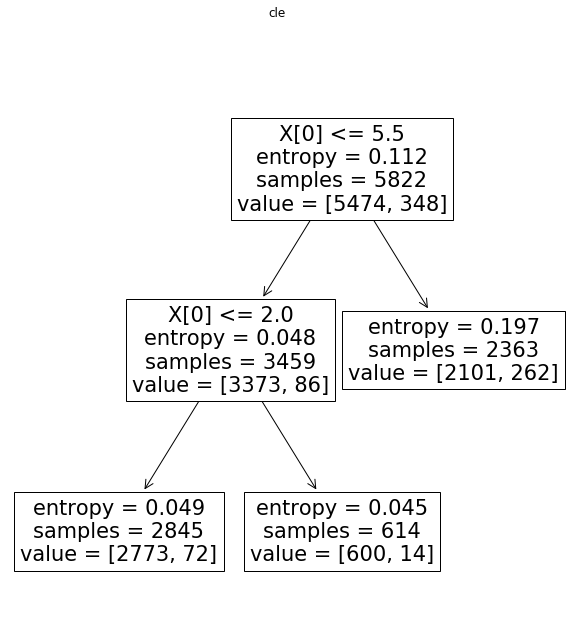

In [13]:
#mt_auto

print(X['mt_auto'].value_counts())

arbre_cla_mta=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mta.fit(X_new[:,0].reshape(X_new.shape[0],1),varexpliquee)
mt_at=np.repeat(-1,X_new.shape[0])
mt_at[X_new[:,0]<=2.0]=0
mt_at[(X_new[:,0]>2.0) & (X_new[:,0]<=5.5)]=1
mt_at[(X_new[:,0]>5.5)]=2

print(mt_at)

for i in range(0,5822):
     X.at[i,'mt_auto'] = mt_at[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mta) 

print(X['mt_auto'].value_counts())

0    5789
1      31
2       2
Name: nb_bateau, dtype: int64
[0 0 0 ... 0 0 0]
0    5789
1      33
Name: nb_bateau, dtype: int64


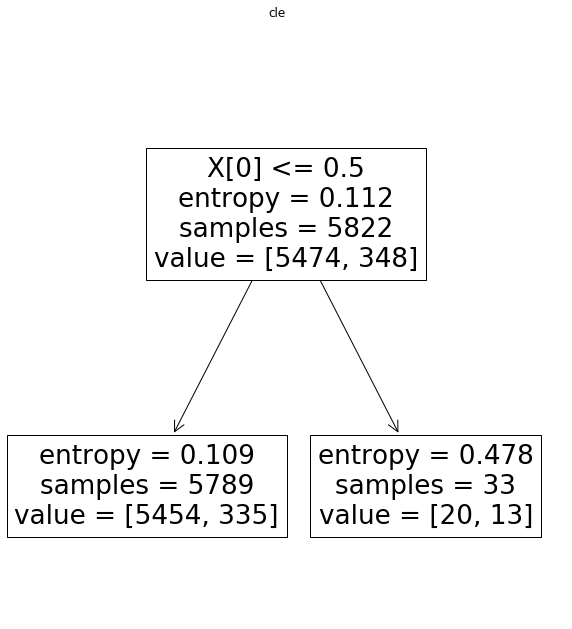

In [14]:
#nb_bateau

print(X['nb_bateau'].value_counts())

arbre_cla_nbb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbb.fit(X_new[:,1].reshape(X_new.shape[0],1),varexpliquee)
nb_b=np.repeat(-1,X_new.shape[0])
nb_b[X_new[:,1]<=0.5]=0
nb_b[(X_new[:,1]>0.5)] = 1

print(nb_b)

for i in range(0,5822):
     X.at[i,'nb_bateau'] = nb_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_nbb) 

print(X['nb_bateau'].value_counts())

0    3482
2    2128
1     201
3      11
Name: mt_RC, dtype: int64
[0 2 2 ... 2 0 1]
0    3482
2    2139
1     201
Name: mt_RC, dtype: int64


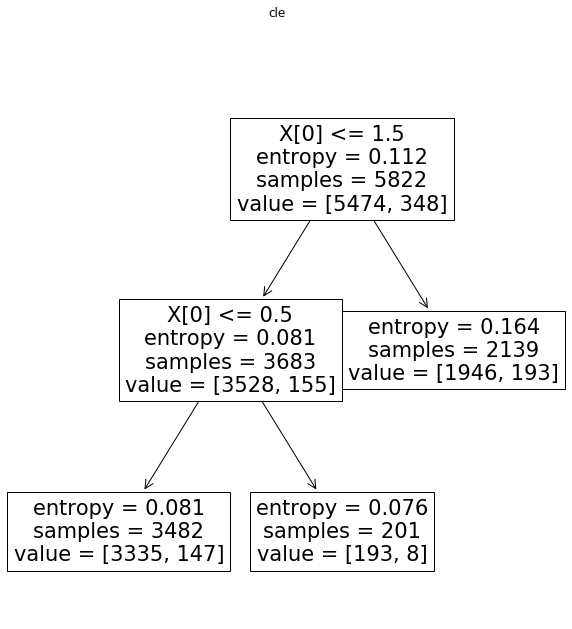

In [15]:
#mt_RC

print(X['mt_RC'].value_counts())

arbre_cla_mtrc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtrc.fit(X_new[:,2].reshape(X_new.shape[0],1),varexpliquee)
mt_rc=np.repeat(-1,X_new.shape[0])
mt_rc[X_new[:,2]<=0.5]=0
mt_rc[(X_new[:,2]>0.5) & (X_new[:,2]<=1.5)]=1
mt_rc[(X_new[:,2]>1.5)]=2

print(mt_rc)

for i in range(0,5822):
     X.at[i,'mt_RC'] = mt_rc[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtrc) 

print(X['mt_RC'].value_counts())

0    2666
4    1226
3     920
2     535
1     161
6     155
5     149
7       9
8       1
Name: mt_incendie, dtype: int64
[3 1 1 ... 2 0 0]
0    2666
2    2146
1     696
3     314
Name: mt_incendie, dtype: int64


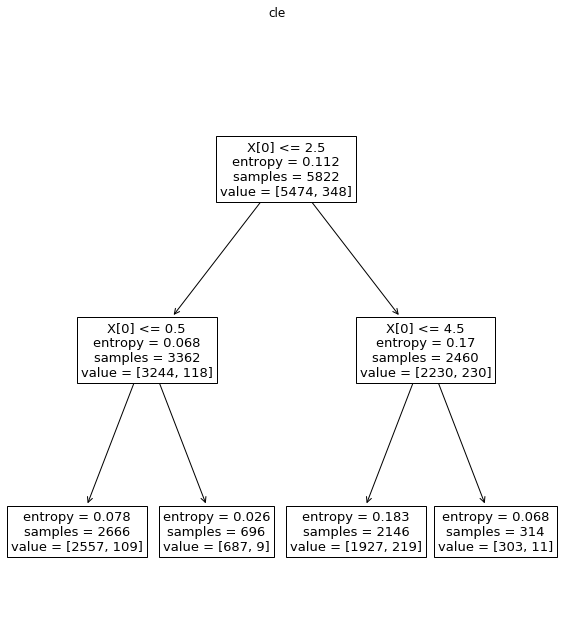

In [16]:
#mt_incendie

print(X['mt_incendie'].value_counts())

arbre_cla_mtinc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtinc.fit(X_new[:,4].reshape(X_new.shape[0],1),varexpliquee)
mt_in=np.repeat(-1,X_new.shape[0])
mt_in[X_new[:,4]<=0.5]=0
mt_in[(X_new[:,4]>0.5) & (X_new[:,4]<=2.5)]=1
mt_in[(X_new[:,4]>2.5) & (X_new[:,4]<=4.5)]=2
mt_in[(X_new[:,4]>4.5)]=3

print(mt_in)

for i in range(0,5822):
     X.at[i,'mt_incendie'] = mt_in[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtinc) 

print(X['mt_incendie'].value_counts())

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: mt_bateau, dtype: int64
[0 0 0 ... 0 0 0]
0    5789
1      33
Name: mt_bateau, dtype: int64


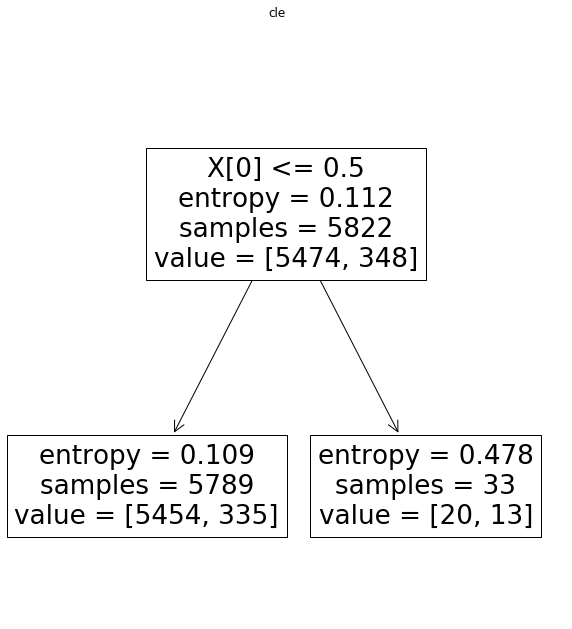

In [17]:
#mt_bateau

print(X['mt_bateau'].value_counts())

arbre_cla_mtb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_mtb.fit(X_new[:,5].reshape(X_new.shape[0],1),varexpliquee)
mt_b=np.repeat(-1,X_new.shape[0])
mt_b[X_new[:,5]<=0.5]=0
mt_b[(X_new[:,5]>0.5)]=1

print(mt_b)

for i in range(0,5822):
     X.at[i,'mt_bateau'] = mt_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtb) 

print(X['mt_bateau'].value_counts())

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: revenu_moyen, dtype: int64
[0 0 0 ... 0 0 0]
2    2942
1    1932
0     725
3     223
Name: revenu_moyen, dtype: int64


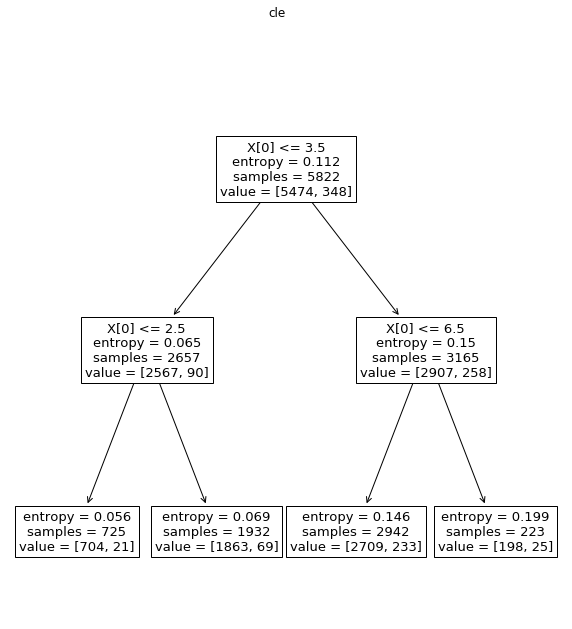

In [18]:
#revenu_moyen

print(X['revenu_moyen'].value_counts())

arbre_cla_rm=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_rm.fit(X_new[:,7].reshape(X_new.shape[0],1),varexpliquee)
rev_moy=np.repeat(-1,X_new.shape[0])
rev_moy[X_new[:,7]<=2.5]=0
rev_moy[(X_new[:,7]>2.5) & (X_new[:,7]<=3.5)]=1
rev_moy[(X_new[:,7]>3.5) & (X_new[:,7]<=6.5)]=2
rev_moy[(X_new[:,7]>6.5)]=3

print(mt_b)

for i in range(0,5822):
     X.at[i,'revenu_moyen'] = rev_moy[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_rm) 

print(X['revenu_moyen'].value_counts())

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: niv_etude_haut, dtype: int64
[0 0 0 ... 0 0 0]
1    3013
0    2147
2     513
3     149
Name: niv_etude_haut, dtype: int64


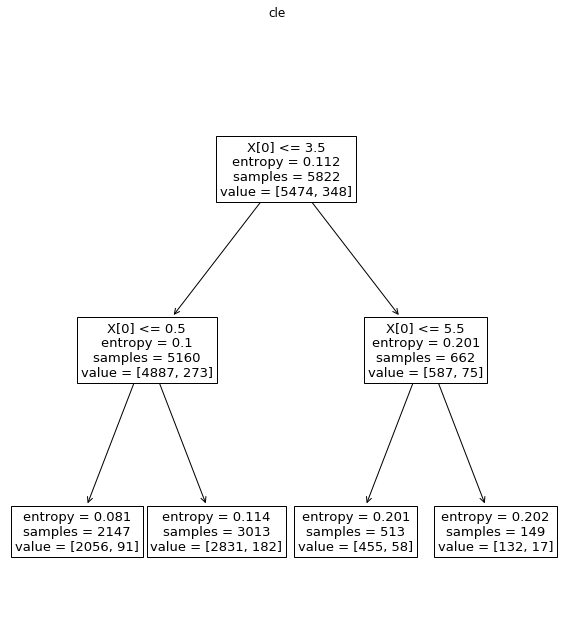

In [19]:
#niv_etude_haut

print(X['niv_etude_haut'].value_counts())

arbre_cla_neh=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_neh.fit(X_new[:,8].reshape(X_new.shape[0],1),varexpliquee)
neh=np.repeat(-1,X_new.shape[0])
neh[X_new[:,8]<=0.5]=0
neh[(X_new[:,8]>0.5) & (X_new[:,8]<=3.5)]=1
neh[(X_new[:,8]>3.5) & (X_new[:,8]<=5.5)]=2
neh[(X_new[:,8]>5.5)]=3

print(mt_b)

for i in range(0,5822):
     X.at[i,'niv_etude_haut'] = neh[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_neh) 

print(X['niv_etude_haut'].value_counts())

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: revenu1, dtype: int64
[0 0 0 ... 0 0 0]
1    1724
3    1715
0    1304
2    1079
Name: revenu1, dtype: int64


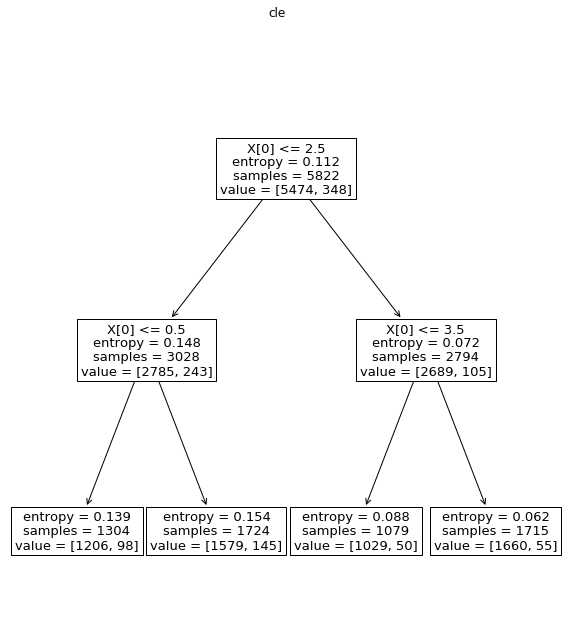

In [20]:
#revenu1

print(X['revenu1'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_r1.fit(X_new[:,9].reshape(X_new.shape[0],1),varexpliquee)
rev_1=np.repeat(-1,X_new.shape[0])
rev_1[X_new[:,9]<=0.5]=0
rev_1[(X_new[:,9]>0.5) & (X_new[:,9]<=2.5)]=1
rev_1[(X_new[:,9]>2.5) & (X_new[:,9]<=3.5)]=2
rev_1[(X_new[:,9]>3.5)]=3

print(mt_b)

for i in range(0,5822):
     X.at[i,'revenu1'] = rev_1[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_r1) 

print(X['revenu1'].value_counts())

In [21]:
print(X)
print(B)

#Retraitement termine

      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           2          0      0              3            3          0   
1           0          0      2              4            1          0   
2           2          0      2              4            1          0   
3           2          0      0              4            1          0   
4           0          0      0              3            3          0   
5           2          0      0              3            0          0   
6           2          0      0              5            0          0   
7           0          0      0              3            0          0   
8           1          0      0              3            0          0   
9           0          0      2              7            2          0   
10          2          0      0              7            0          0   
11          1          0      2              4            1          0   
12          2          0      0       

[[2 0 0 ... 2 1 0]
 [0 0 2 ... 2 0 1]
 [2 0 2 ... 1 0 3]
 ...
 [2 0 2 ... 2 2 0]
 [0 0 1 ... 1 0 1]
 [2 0 2 ... 2 1 1]]
[0 0 0 ... 1 1 1]
(6081, 10)
(1521, 10)
(6081,)
(1521,)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.0359381366380464, 'penalty': 'l2', 'solver': 'liblinear'}
0.7452721591843446


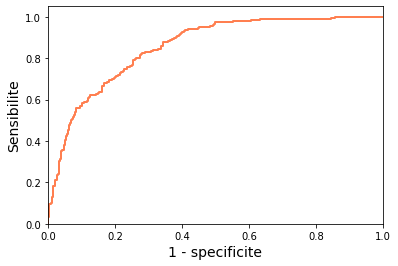

0.8537720678505353


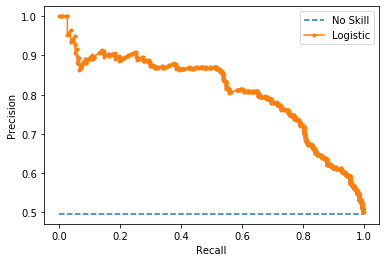

[[592 174]
 [192 563]]


precision
0.7639077340569878
rappel
0.7456953642384105
score f1
0.7546916890080428




In [22]:
#Regression logistique

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_reglog, y_reglog = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_reglog, y_reglog = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_reglog, y_reglog = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_reglog, y_reglog = smote_enn.fit_resample(X, y)

print(X_reglog)
print(y_reglog)

#On fait la separation
#On separe a ce niveau pour que toutes les donnes meme x_test soit traite

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_reglog, y_reglog, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#Standardisation car Reg Log
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#Preprocessing termine, la base est prete, elle est stocke dans X_train,X_test,Y_train,Y_test

#Regression Logistique

#model_rl = LogisticRegression(solver='liblinear', random_state=0)
#model_rl.fit(X_train_std,y_train)

#Construction d'une grille
parameters = {'penalty':['l1', 'l2'],'C':np.logspace(-10,1,10),'solver':['liblinear','saga']}

model = LogisticRegression()
grid_reg_log = model_selection.GridSearchCV(model,param_grid = parameters,scoring='accuracy')
model_rl = grid_reg_log.fit(X_train_std,y_train)
print(model_rl.best_params_)
print(model_rl.best_score_) #realise automatiquement par validation croisee

# Courbe Roc
y_pred_proba = model_rl.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
plt.show()

print(metrics.auc(fpr, tpr))


# precision-recall curve and f1
# predict probabilities
lr_probs = model_rl.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_rl.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Mesure de performance

#Prediciton
pred = model_rl.predict(X_test_std)
# matrice de confusion

print(confusion_matrix(y_test,pred))
print()
print()
#precision
print("precision")
print(precision_score(y_test,pred))
#rappel
print("rappel")
print(recall_score(y_test,pred))
#f1 score
print("score f1")
print(f1_score(y_test,pred))
print()
print()

In [23]:
#Arbre de decision

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_ad, y_ad = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_ad, y_ad = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_ad, y_ad = smote_tomek.fit_resample(X, y)

#Bon resultat
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_ad, y_ad = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ad, y_ad, test_size=0.2)

# définition du modèle
tree= DecisionTreeClassifier(max_depth=9)
treeC=tree.fit(X_train, y_train)

# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

# Prévision de l'échantillon test
yChap = treeOpt.predict(X_test)
# matrice de confusion
print(confusion_matrix(y_test,yChap))

Meilleur score = 0.118237, Meilleur paramètre = {'max_depth': 9}
[[585 144]
 [ 47 745]]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The optimal parameters are {'C': 10, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.87
0.9182626869854149


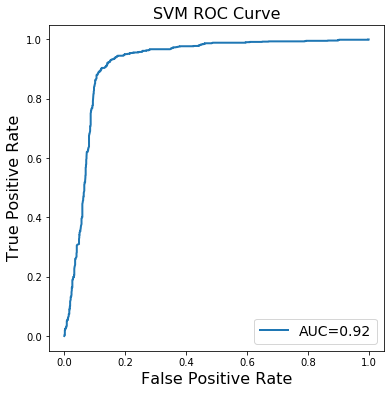

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [24]:
#SVM (5 minutes d execution)

#Over / Under sampling

#Bon Resultat 
from imblearn.over_sampling import SMOTE, ADASYN
X_svm, y_svm = SMOTE().fit_resample(X, y)

#Separation jeu entrainement, test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_svm, y_svm, test_size=0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Pour svm, on doit standardiser les donnes

# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# definir les hyperp parametres 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid) 
  
# on test le modele optimal
grille = grid.fit(X_train_std, y_train) 

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grille.best_params_, grid.best_score_))

# prédire sur le jeu de test avec le modèle optimisé
y_pred = grille.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)
print(auc_cv)

# La courbe ROC
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='AUC=%.2f' % auc_cv)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

print(confusion_matrix(y_test, y_pred))

(6081, 10)
(1521, 10)
(6081,)
(1521,)
[[661 100]
 [359 401]]
0.7059694129255056


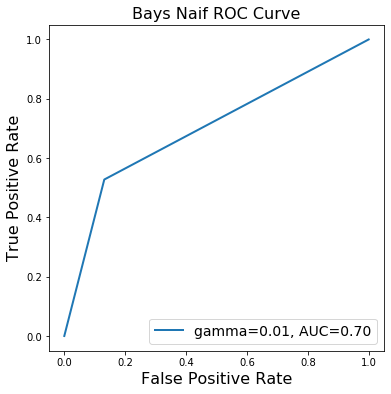

In [25]:
#Baysien naïf

#Over / Under sampling

#Resultat nul
#from imblearn.over_sampling import SMOTE, ADASYN
#X_bn, y_bn = SMOTE().fit_resample(X, y)

#Resultat catastrophique, cest de l aleatoire
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_bn, y_bn = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_bn, y_bn = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_bn, y_bn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_bn, y_bn, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)
gnb.score(X_train_std,y_train)

y_pred = gnb.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))

print(gnb.score(X_train_std,y_train))

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Bays Naif ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

Train on 4864 samples, validate on 1217 samples
Epoch 1/500
4864/4864 [==============================] - 0s 93us/sample - loss: 0.6575 - accuracy: 0.6262 - val_loss: 0.6289 - val_accuracy: 0.6664
Epoch 2/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.6218 - accuracy: 0.6731 - val_loss: 0.6064 - val_accuracy: 0.6919
Epoch 3/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.5986 - accuracy: 0.6974 - val_loss: 0.5823 - val_accuracy: 0.7141
Epoch 4/500
4864/4864 [==============================] - 0s 32us/sample - loss: 0.5750 - accuracy: 0.7200 - val_loss: 0.5595 - val_accuracy: 0.7305
Epoch 5/500
4864/4864 [==============================] - 0s 32us/sample - loss: 0.5549 - accuracy: 0.7340 - val_loss: 0.5427 - val_accuracy: 0.7338
Epoch 6/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.5418 - accuracy: 0.7340 - val_loss: 0.5321 - val_accuracy: 0.7518
Epoch 7/500
4864/4864 [==============================] - 0s 30us

Epoch 56/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4948 - accuracy: 0.7597 - val_loss: 0.4905 - val_accuracy: 0.7576
Epoch 57/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4945 - accuracy: 0.7580 - val_loss: 0.4879 - val_accuracy: 0.7773
Epoch 58/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4934 - accuracy: 0.7621 - val_loss: 0.4871 - val_accuracy: 0.7699
Epoch 59/500
4864/4864 [==============================] - 0s 33us/sample - loss: 0.4932 - accuracy: 0.7650 - val_loss: 0.4941 - val_accuracy: 0.7518
Epoch 60/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4930 - accuracy: 0.7632 - val_loss: 0.4876 - val_accuracy: 0.7666
Epoch 61/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4931 - accuracy: 0.7613 - val_loss: 0.4852 - val_accuracy: 0.7749
Epoch 62/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4928 - accuracy: 0.7642

Epoch 111/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4704 - accuracy: 0.7806 - val_loss: 0.4603 - val_accuracy: 0.7896
Epoch 112/500
4864/4864 [==============================] - 0s 33us/sample - loss: 0.4698 - accuracy: 0.7852 - val_loss: 0.4611 - val_accuracy: 0.7790
Epoch 113/500
4864/4864 [==============================] - 0s 32us/sample - loss: 0.4694 - accuracy: 0.7843 - val_loss: 0.4643 - val_accuracy: 0.7880
Epoch 114/500
4864/4864 [==============================] - 0s 33us/sample - loss: 0.4694 - accuracy: 0.7808 - val_loss: 0.4601 - val_accuracy: 0.7765
Epoch 115/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4688 - accuracy: 0.7835 - val_loss: 0.4627 - val_accuracy: 0.7831
Epoch 116/500
4864/4864 [==============================] - 0s 32us/sample - loss: 0.4682 - accuracy: 0.7862 - val_loss: 0.4586 - val_accuracy: 0.7864
Epoch 117/500
4864/4864 [==============================] - 0s 32us/sample - loss: 0.4674 - accuracy:

Epoch 220/500
4864/4864 [==============================] - 0s 29us/sample - loss: 0.4233 - accuracy: 0.8049 - val_loss: 0.4337 - val_accuracy: 0.7995
Epoch 221/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4239 - accuracy: 0.8024 - val_loss: 0.4219 - val_accuracy: 0.8020
Epoch 222/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4238 - accuracy: 0.8065 - val_loss: 0.4171 - val_accuracy: 0.8061
Epoch 223/500
4864/4864 [==============================] - 0s 33us/sample - loss: 0.4226 - accuracy: 0.8072 - val_loss: 0.4259 - val_accuracy: 0.7896
Epoch 224/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4227 - accuracy: 0.8076 - val_loss: 0.4379 - val_accuracy: 0.7872
Epoch 225/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4228 - accuracy: 0.8109 - val_loss: 0.4247 - val_accuracy: 0.8003
Epoch 226/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4211 - accuracy:

Epoch 329/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4082 - accuracy: 0.8141 - val_loss: 0.4080 - val_accuracy: 0.8110
Epoch 330/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4103 - accuracy: 0.8158 - val_loss: 0.4106 - val_accuracy: 0.8192
Epoch 331/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4097 - accuracy: 0.8160 - val_loss: 0.4117 - val_accuracy: 0.8151
Epoch 332/500
4864/4864 [==============================] - 0s 33us/sample - loss: 0.4099 - accuracy: 0.8166 - val_loss: 0.4081 - val_accuracy: 0.8225
Epoch 333/500
4864/4864 [==============================] - 0s 29us/sample - loss: 0.4101 - accuracy: 0.8162 - val_loss: 0.4116 - val_accuracy: 0.8176
Epoch 334/500
4864/4864 [==============================] - 0s 43us/sample - loss: 0.4096 - accuracy: 0.8154 - val_loss: 0.4069 - val_accuracy: 0.8200
Epoch 335/500
4864/4864 [==============================] - 0s 46us/sample - loss: 0.4096 - accuracy:

Epoch 438/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4046 - accuracy: 0.8201 - val_loss: 0.4247 - val_accuracy: 0.8003
Epoch 439/500
4864/4864 [==============================] - 0s 31us/sample - loss: 0.4057 - accuracy: 0.8160 - val_loss: 0.4028 - val_accuracy: 0.8258
Epoch 440/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4032 - accuracy: 0.8178 - val_loss: 0.4043 - val_accuracy: 0.8266
Epoch 441/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4047 - accuracy: 0.8189 - val_loss: 0.4055 - val_accuracy: 0.8192
Epoch 442/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4039 - accuracy: 0.8178 - val_loss: 0.3994 - val_accuracy: 0.8242
Epoch 443/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4041 - accuracy: 0.8162 - val_loss: 0.4092 - val_accuracy: 0.8192
Epoch 444/500
4864/4864 [==============================] - 0s 30us/sample - loss: 0.4025 - accuracy:

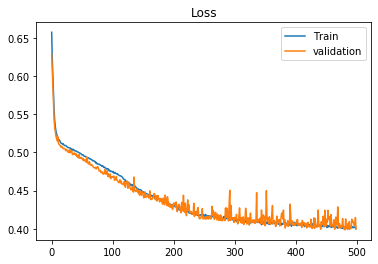

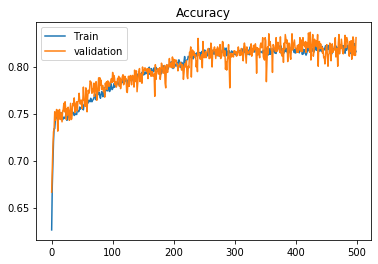

1521/1521 [==============================] - 0s 72us/sample - loss: 1.2477 - accuracy: 0.5970
(1521,)
(1521,)
[[141 588]
 [ 25 767]]


In [26]:
#Reseau de neurone

import tensorflow as tf

# Utilisation du package tensorflow à installer

#print(X)
#print(y)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_rn, y_rn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_rn, y_rn, test_size=0.2,random_state = 1)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(5, activation = "relu"))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

history= model.fit(X_train, y_train, epochs = 500,validation_split = 0.2)

model.summary()

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train")
plt.plot(loss_val_curve, label="validation")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(acc_curve, label = "Train")
plt.plot(acc_val_curve, label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

model.evaluate(X_test_std,y_test)

y_pred = model.predict(X_test_std)

L = []
for i in range(1521):
    if y_pred[i][0] > y_pred[i][1]:
        L.append(0)
    else:
        L.append(1)

print(y_test.shape)
y_pred_fin = np.array(L)
print(y_pred_fin.shape)
print(confusion_matrix(y_test, y_pred_fin))